<a href="https://colab.research.google.com/github/sarvesh23110076/CS203_Assign_5/blob/main/LAB05_STT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<B>CS203 : Software Tools and Techniques fo AI </B><br>
<B>LAB2 Assignment</B><br>
<B>Group Number : 08<Br>
<B>Group Members :</B><br>
<B>Sarvesh Pravin Chaudhari (<I>23110076</I>)<br>
Afraz Azeem (<I>23110019</I>)<B>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

drive_cats_path = '/content/drive/MyDrive/cats'
drive_dogs_path = '/content/drive/MyDrive/dogs'

print("Cats folder exists:", os.path.exists(drive_cats_path))
print("Dogs folder exists:", os.path.exists(drive_dogs_path))

Cats folder exists: True
Dogs folder exists: True



Copied files:
Cats count: 70
Dogs count: 70


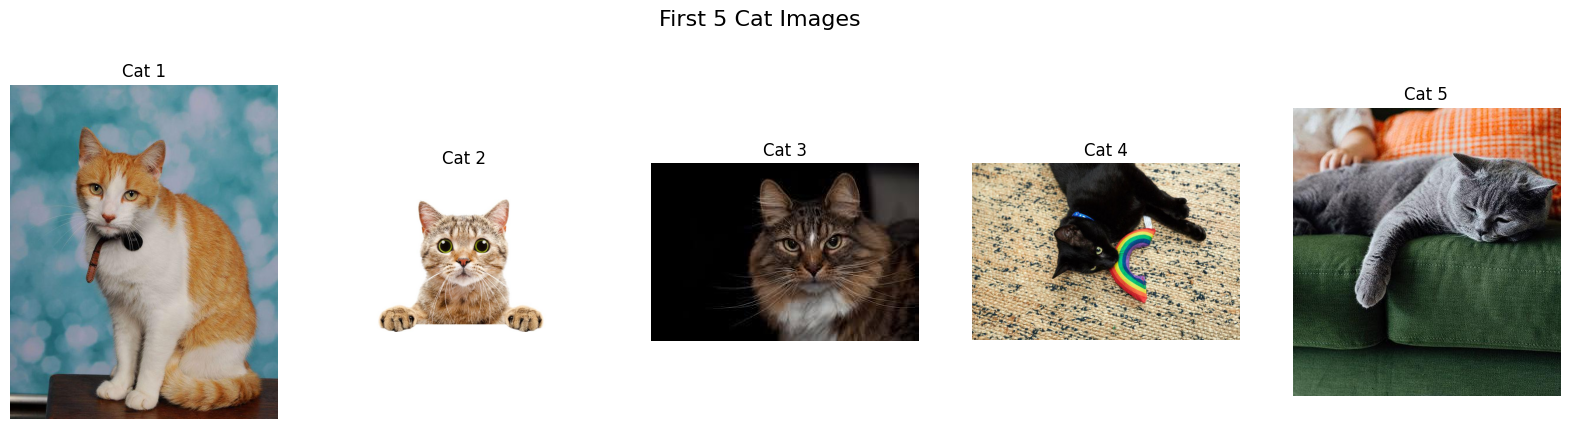

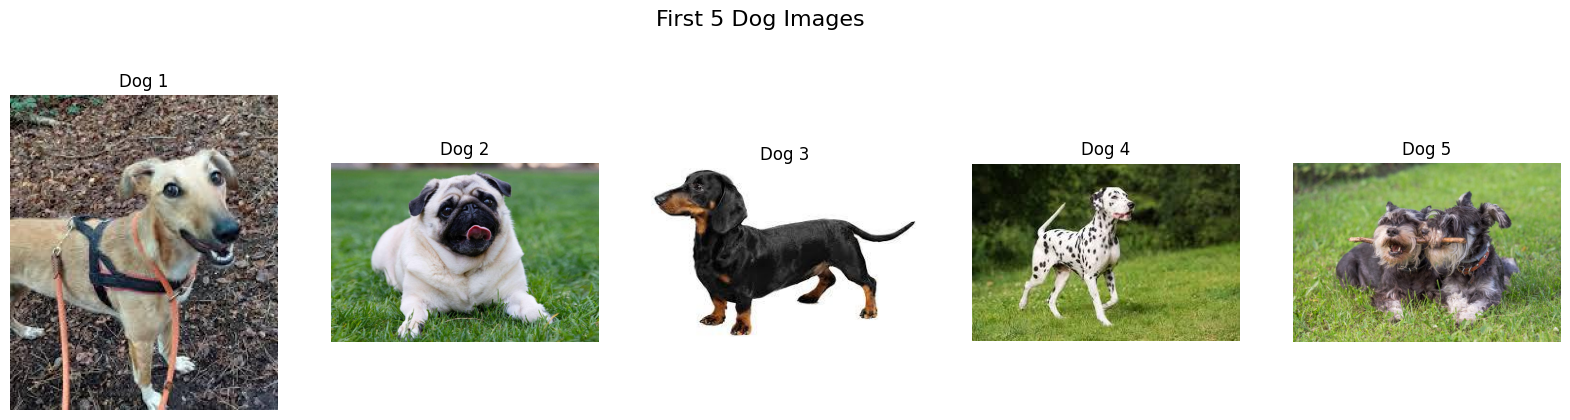

In [ ]:
# 3. Copy to Colab environment
import shutil

# Copy cats
shutil.copytree(drive_cats_path, '/content/cats')
# Copy dogs
shutil.copytree(drive_dogs_path, '/content/dogs')

# 4. Verify copy
print("\nCopied files:")
print("Cats count:", len(os.listdir('/content/cats')))
print("Dogs count:", len(os.listdir('/content/dogs')))

# 5. Display first 5 images from each class
import matplotlib.pyplot as plt
from PIL import Image

def show_first_5(folder_path, class_name):
    files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg'))])

    plt.figure(figsize=(20, 5))
    plt.suptitle(f"First 5 {class_name} Images", fontsize=16)

    for i in range(5):
        img_path = os.path.join(folder_path, files[i])
        img = Image.open(img_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{class_name} {i+1}")
    plt.show()

# Show cats
show_first_5('/content/cats', 'Cat')
# Show dogs
show_first_5('/content/dogs', 'Dog')

In [ ]:
!pip install augly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 47.2 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31528 sha256=f124725a3bc6f6e6f84f607b961e6ec24aa90f01a723caecc6ee6d412119aa42
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built iopath


In [ ]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

import augly.image as augly

In [ ]:
# 1. Setup directories
base_dir = '/content'
aug_dir = '/content/augmented_dataset'
class_names = ['cats', 'dogs']

In [ ]:
# 2. Prepare dataset
def get_image_paths(directory):
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.jpg')]

cat_images = get_image_paths(os.path.join(base_dir, 'cats'))
dog_images = get_image_paths(os.path.join(base_dir, 'dogs'))

In [ ]:
# 3. Split dataset (80:20)
train_cats, test_cats = train_test_split(cat_images, test_size=0.2, random_state=42)
train_dogs, test_dogs = train_test_split(dog_images, test_size=0.2, random_state=42)

In [ ]:
# 4. Augmentation function
def augment_image(image_path):
    img = Image.open(image_path)
    augmentations = [
        augly.rotate(img, degrees=random.uniform(-45, 45)),
        augly.blur(img, radius=random.uniform(0.5, 1.5)),
        augly.brightness(img, factor=random.uniform(0.5, 1.5)),
        augly.crop(img, x1=0.1, y1=0.1, x2=0.9, y2=0.9),
        augly.hflip(img),
        augly.vflip(img),
        augly.pixelization(img),
        augly.contrast(img, factor=random.uniform(0.5, 1.5)),
        augly.saturation(img, factor=random.uniform(0.5, 1.5)),
        augly.random_noise(img)
    ]
    return random.sample(augmentations, 3)

In [ ]:
# 5. Process and augment images
def process_images(image_list, class_name, is_train=True):
    for img_path in image_list:
        # Copy original image
        dest_dir = os.path.join(aug_dir, 'train' if is_train else 'test', class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(img_path, dest_dir)

        if is_train:
            # Create two augmented versions
            for i in range(2):
                aug_img = Image.open(img_path)
                for aug in augment_image(img_path):
                    aug_img = aug
                aug_img.save(os.path.join(dest_dir, f'aug_{i}_{os.path.basename(img_path)}'))

In [ ]:
# Process all images
process_images(train_cats, 'cats')
process_images(train_dogs, 'dogs')
process_images(test_cats, 'cats', is_train=False)
process_images(test_dogs, 'dogs', is_train=False)

In [ ]:
# 6. Calculate statistics
stats = {
    'Original Train (Cats)': len(train_cats),
    'Original Train (Dogs)': len(train_dogs),
    'Augmented Train (Cats)': len(train_cats) * 3,
    'Augmented Train (Dogs)': len(train_dogs) * 3,
    'Test (Cats)': len(test_cats),
    'Test (Dogs)': len(test_dogs)
}

In [ ]:
stats

{'Original Train (Cats)': 56,
 'Original Train (Dogs)': 56,
 'Augmented Train (Cats)': 168,
 'Augmented Train (Dogs)': 168,
 'Test (Cats)': 14,
 'Test (Dogs)': 14}

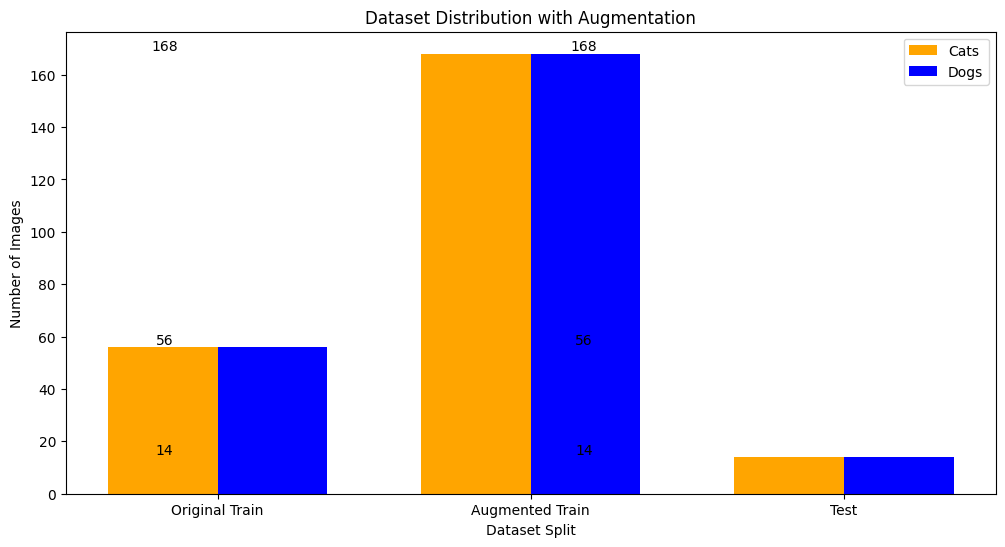

In [ ]:
# 7. Visualize results
categories = ['Original Train', 'Augmented Train', 'Test']
cats = [stats['Original Train (Cats)'], stats['Augmented Train (Cats)'], stats['Test (Cats)']]
dogs = [stats['Original Train (Dogs)'], stats['Augmented Train (Dogs)'], stats['Test (Dogs)']]

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(categories))
width = 0.35

ax.bar(x - width/2, cats, width, label='Cats', color='orange')
ax.bar(x + width/2, dogs, width, label='Dogs', color='blue')

ax.set_title('Dataset Distribution with Augmentation')
ax.set_xlabel('Dataset Split')
ax.set_ylabel('Number of Images')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

for i, v in enumerate(cats + dogs):
    ax.text(i // 3 - 0.17 if i < 3 else i // 3 + 0.17, v, str(v), ha='center', va='bottom')

plt.show()

The Original dataset had 56 images each of dogs and cats in the train set. After augmentation, each original image was augmented twice, resulting in 3x the original count (1 original + 2 augmented copies). The test set remains unchanged and balanced, with 14 cat and dog images each. This ensures that the test set is not augmented and maintains its integrity for unbiased evaluation. Thus, Augmentation has successfully increased the size of the training dataset without altering the test set. This helps improve model generalization by introducing variability in the training data.

In [ ]:
# 7. Verify test set balance
test_balance = stats['Test (Cats)'] == stats['Test (Dogs)']
print(f"\nTest Set Balanced: {test_balance}")
print(f"Cats in Test: {stats['Test (Cats)']}, Dogs in Test: {stats['Test (Dogs)']}")


Test Set Balanced: True
Cats in Test: 14, Dogs in Test: 14


# **Task 2: Model Training**

In [ ]:
import torchvision
import torch
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
def create_paths(path):
  folder=os.listdir(os.path.join(path))
  folder_paths=[os.path.join(path,img_path) for img_path in folder]
  return folder_paths

def create_dataset(cats_folder,dogs_folder):
  paths=cats_folder+dogs_folder

  y=[0]*len(cats_folder)+[1]*len(dogs_folder)
  y=torch.tensor(y).float()

  processed_images = []
  transforms=torchvision.transforms.Resize((224,224))
  for img_path in paths:
    img=torchvision.io.read_image(img_path).float()/255.0
    processed_images.append(transforms(img))

  x=torch.stack(processed_images)

  dataset=TensorDataset(x,y)
  loader=DataLoader(dataset,batch_size=32,shuffle=True)
  return loader

In [ ]:
#Paths for augmented folders
train_cats_aug_path=os.path.join('/content/augmented_dataset/train/cats')
train_dogs_aug_path=os.path.join('/content/augmented_dataset/train/dogs')

In [ ]:
#Creating augmented dataset
(train_cats_aug,train_dogs_aug)=(create_paths(train_cats_aug_path),create_paths(train_dogs_aug_path))

In [ ]:
#Creating dataset loader for unaugmented dataset,augmented dataset and test dataset
train_loader_unaug=create_dataset(train_cats,train_dogs)
train_loader_aug=create_dataset(train_cats+train_cats_aug,train_dogs+train_dogs_aug)
test_loader=create_dataset(test_cats,test_dogs)

***Choose (microsoft/ resnet-50)model from the hugging face and initialize its new weights.***

In [ ]:
from transformers import AutoFeatureExtractor, AutoModel

#Adding a layer to the pre-trained model in order to predict on required classes
class ClassificationHead(torch.nn.Module):
  def __init__(self,input_size):
    super().__init__()
    self.head=torch.nn.Linear(input_size,1)

  def forward(self,features):
    x=self.head(features)
    return x

#Creating a model using pre-trained and adding a final hidden layer for the prediction purpose
class Resnet50(torch.nn.Module):
  def __init__(self,model_name):
    super().__init__()
    self.resnet=AutoModel.from_pretrained(model_name)
    self.prediction=ClassificationHead(2048)
    self.unfreeze_last_layers()

  #initial the weights
  def unfreeze_last_layers(self):
    for param in self.resnet.parameters():
      param.requires_grad=False
    for param in list(self.resnet.parameters())[-10]:
      param.requires_grad=True

  def forward(self,img):
    outputs=self.resnet(img)
    resnet_output=outputs.pooler_output
    resnet_output=resnet_output.reshape(resnet_output.shape[0],-1)
    prediction=self.prediction(resnet_output)
    return prediction.squeeze(1)

In [ ]:
#Function used for training the model
def train(model,loader,lr,epochs):
  critersion=torch.nn.BCEWithLogitsLoss()#As the truth labels are in binary form
  optimization=torch.optim.Adam(model.parameters(),lr=lr)

  for epoch in range(epochs):
    model.train()
    for image,label in loader:
      optimization.zero_grad()
      output=model(image).squeeze()
      loss=critersion(output,label)
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(),max_norm=1.0)
      optimization.step()
  return model

 ***Initial weights of the model should be the same when training with both datasets.***


In [ ]:
model_name="microsoft/resnet-50"

#Initialling a model using pre-trained
import copy
initial_model=Resnet50(model_name)
initial_state=copy.deepcopy(initial_model.state_dict())

#Creating a copy of the initial model
model1=Resnet50(model_name)
model2=Resnet50(model_name)

#Setting the 2 models to the same initial state
model1.load_state_dict(initial_state)
model2.load_state_dict(initial_state)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

<All keys matched successfully>

***Train model(created in the above point) on a downloaded dataset, without augmentation.***

In [ ]:
#Training and Evaluating model for dataset without augmentation
model1=train(model1,train_loader_unaug,0.0001,5)
model1.eval()

y_pred=[]
y_test=[]
with torch.no_grad():
  for images,labels in test_loader:
    output=model1(images).squeeze()
    predictions=(torch.sigmoid(output)>0.5).long()
    y_pred.append(predictions)
    y_test.append(labels)

y_pred_1=y_pred[0]
y_test_1=y_test[0]

***Train model(created in the first point) on a downloaded dataset with augmentation.***

In [ ]:
#Training and evaluating model for dataset with augmentation
model2=train(model2,train_loader_aug,0.0001,5)
model2.eval()

y_pred=[]
y_test=[]
with torch.no_grad():
  for images,labels in test_loader:
    output=model2(images).squeeze()
    predictions=(torch.sigmoid(output)>0.5).long()
    y_pred.append(predictions)
    y_test.append(labels)

y_pred_2=y_pred[0]
y_test_2=y_test[0]

***Get the precision, recall, F1 score, and accuracy of both the models on the test set.***

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
#Creating metrics function to compute accuracy,precision,recall and f1_score
def metrics_function(pred_value,test_value):
  accuracy=accuracy_score(pred_value,test_value)
  precision_value=precision_score(pred_value,test_value)
  recall_value=recall_score(pred_value,test_value)
  f1_value=f1_score(pred_value,test_value)

  return [accuracy,precision_value,recall_value,f1_value]

In [ ]:
model1_metrics=metrics_function(y_pred_1,y_test_1)
model2_metrics=metrics_function(y_pred_2,y_test_2)

In [ ]:
import pandas as pd
dic={
    'Model1':model1_metrics,
    'Model2':model2_metrics
}

ind=['Accuracy','Precision','Recall','F1 score']

result=pd.DataFrame(dic,index=ind)

In [ ]:
#Comparing the obtained results
result

,Model1,Model2
Accuracy,0.750000,0.821429
Precision,0.928571,0.642857
Recall,0.684211,1.000000
F1 score,0.787879,0.782609


Conclusion from the metrics table:  
Model 1 has significantly higher precision than Model 2. This means Model 1 makes fewer false positive predictions, focusing on being correct when it predicts a class. Model 2 achieves perfect recall compared to Model 1. This suggests Model 2 identifies all positive examples but at the cost of more false positives, which lowers its precision. Both models have similar F1 scores, indicating a balance between precision and recall. Model 2 has higher accuracy because it correctly predicts a larger proportion of both classes overall. Its perfect recall ensures that no positive examples are missed, which boosts accuracy despite lower precision.